In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [3]:
bundle_data = bundles.load("quantopian-quandl")

In [4]:
print(type(bundle_data))

<class 'zipline.data.bundles.core.BundleData'>


In [5]:
end_date = pd.Timestamp("2014-01-01", tz="utc")

In [6]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [7]:
data_por = DataPortal(
    asset_finder=bundle_data.asset_finder, 
    trading_calendar=get_calendar("NYSE"),
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader=bundle_data.equity_daily_bar_reader
)

In [8]:
TSLA = data_por.asset_finder.lookup_symbol(
    "TSLA",
    as_of_date=None
)

In [9]:
df = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=31 * 12,
    frequency='1d',
    data_frequency='daily',
    field="open"
)

In [10]:
df.head()

,Equity(2862 [TSLA])
2012-07-11 00:00:00+00:00,31.57
2012-07-12 00:00:00+00:00,31.29
2012-07-13 00:00:00+00:00,32.97
2012-07-16 00:00:00+00:00,34.32
2012-07-17 00:00:00+00:00,35.00


In [11]:
df.describe()

,Equity(2862 [TSLA])
count,372.000000
mean,80.908043
std,55.761556
min,26.840000
25%,32.780000
50%,42.730000
75%,136.442500
max,193.960000


In [12]:
df.index = pd.DatetimeIndex(df.index)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
type(df.columns)

pandas.core.indexes.base.Index

In [15]:
list(df.columns)[0]

Equity(2862 [TSLA])

In [16]:
df['open'] = df[list(df.columns)[0]]

In [17]:
df.head()

,Equity(2862 [TSLA]),open
2012-07-11 00:00:00+00:00,31.57,31.57
2012-07-12 00:00:00+00:00,31.29,31.29
2012-07-13 00:00:00+00:00,32.97,32.97
2012-07-16 00:00:00+00:00,34.32,34.32
2012-07-17 00:00:00+00:00,35.00,35.00


In [18]:
df = df.drop(columns=[list(df.columns)[0]])

In [19]:
df.head()

,open
2012-07-11 00:00:00+00:00,31.57
2012-07-12 00:00:00+00:00,31.29
2012-07-13 00:00:00+00:00,32.97
2012-07-16 00:00:00+00:00,34.32
2012-07-17 00:00:00+00:00,35.00


In [20]:
df['close'] = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=31 * 12,
    frequency='1d',
    data_frequency='daily',
    field="close"
)

In [21]:
df['low'] = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=31 * 12,
    frequency='1d',
    data_frequency='daily',
    field="low"
)

In [22]:
df['high'] = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=31 * 12,
    frequency='1d',
    data_frequency='daily',
    field="high"
)

In [23]:
type(df['high'])

pandas.core.series.Series

In [24]:
df.head()

,open,close,low,high
2012-07-11 00:00:00+00:00,31.57,31.51,31.01,31.68
2012-07-12 00:00:00+00:00,31.29,32.70,30.80,33.01
2012-07-13 00:00:00+00:00,32.97,34.25,32.83,34.40
2012-07-16 00:00:00+00:00,34.32,35.96,33.90,36.00
2012-07-17 00:00:00+00:00,35.00,33.35,32.38,35.21


In [25]:
df.tail()

,open,close,low,high
2013-12-26 00:00:00+00:00,155.04,155.500,154.290,158.000
2013-12-27 00:00:00+00:00,155.30,151.120,150.800,155.500
2013-12-30 00:00:00+00:00,151.12,152.440,150.750,154.810
2013-12-31 00:00:00+00:00,152.32,150.429,148.661,153.200
2014-01-02 00:00:00+00:00,149.80,150.100,146.550,152.477


In [26]:
from zipline.data.data_portal import OHLCV_FIELDS

print(OHLCV_FIELDS)

frozenset(['high', 'close', 'open', 'low', 'volume'])


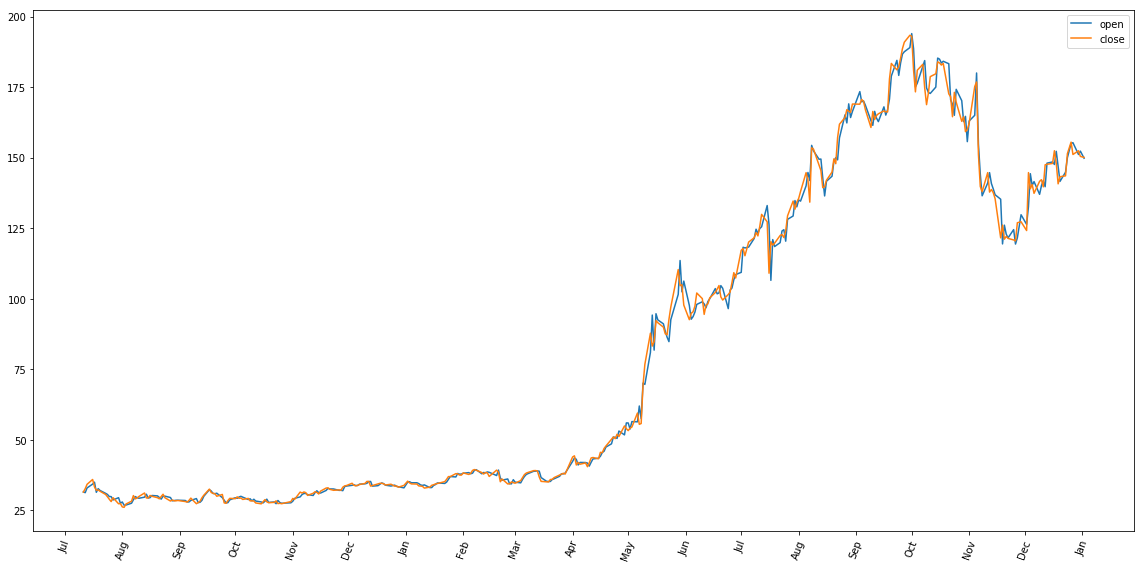

In [27]:
from matplotlib.dates import MonthLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df.index, df.open)
ax.plot(df.index, df.close)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

#### Link <a href="https://www.forbes.com/sites/jimgorzelany/2013/10/02/tesla-model-s-catches-fire-stock-price-drops/#27f44d49781a"> Read More </a>

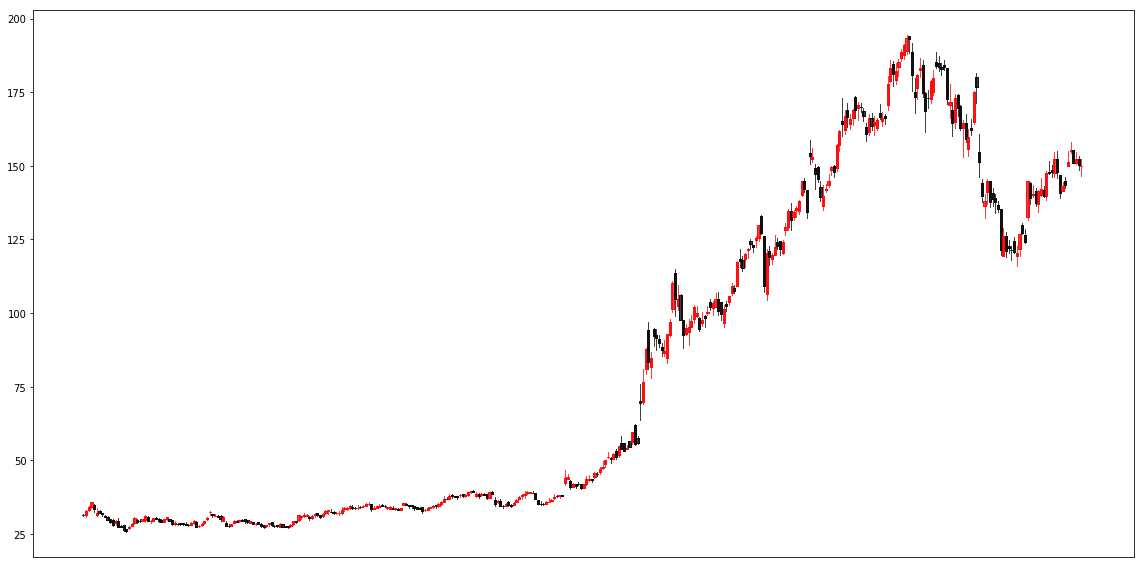

In [28]:
from mpl_finance import candlestick2_ohlc

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

candlestick2_ohlc(ax,
                 opens=df.open,
                 closes=df.close,
                 highs=df.high,
                 lows=df.low,
                 width=0.8,
                 colorup='r',
                 colordown='k')

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()